<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
import random
import scipy.stats as stats
from scipy.stats import chi2_contingency
import sklearn.metrics as metrics
from IPython.display import Image
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
random.seed(13261058)
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
X_train = pd.read_table("X_train.txt",sep=',');

In [3]:
X_train.head()

,ACH_IN_MTD_AMT,ACH_IN_MTD_QTY,ACH_OUT_MTD_AMT,ACH_OUT_MTD_QTY,CHK_WRITTEN_MTD_QTY,DEBIT_CARD_MTD_AMT,DEBIT_CARD_MTD_QTY,MOBILE_STD_DEP_QTY,%diff_ACH_IN,diff_ACH_IN_QTY,...,CREDIT_CARD_BAL_AMT,LAST_DIRECT_DEPOSIT_AMT,AVG_MONTHLY_BAL_AMT,LAST_STMT_BAL_AMT,%diff_AVG_MONTHLY_BAL,%diff_LAST_STMT_BAL,recency,DIRECT_DEP_IND_Y,ACTIVE_CHK_IND_Y,HABITUAL_OD_IND_Y
0,0.0000,0.0,247.85,2.0,0.0,0.0000,0.0,0.0,0.000000,0.0,...,0.0,0.0,25.0,5.0,-0.444444,-0.833333,7,0,0,0
1,2157.4200,2.0,0.00,0.0,0.0,740.8600,14.0,0.0,-0.194313,-1.0,...,0.0,1240.0,2098.0,2602.0,-0.243419,0.044141,131,1,1,0
2,15476.1000,7.0,2622.80,6.0,3.0,5690.3753,125.0,0.0,0.752569,1.0,...,2486.0,3006.0,16348.0,21006.0,-0.264001,-0.318872,174,1,1,0
3,35569.1269,3.0,15201.44,17.0,1.0,0.0000,0.0,0.0,0.422348,1.0,...,0.0,14267.0,50780.0,21327.0,0.213816,1.666542,193,1,1,0
4,1916.7100,3.0,0.00,0.0,0.0,0.0000,0.0,0.0,0.342413,1.0,...,0.0,742.0,138.0,-6.0,-0.158537,-1.206897,94,1,1,0


In [4]:
X_train.shape

(80013, 34)

In [5]:
X_train.columns

Index(['ACH_IN_MTD_AMT', 'ACH_IN_MTD_QTY', 'ACH_OUT_MTD_AMT',
       'ACH_OUT_MTD_QTY', 'CHK_WRITTEN_MTD_QTY', 'DEBIT_CARD_MTD_AMT',
       'DEBIT_CARD_MTD_QTY', 'MOBILE_STD_DEP_QTY', '%diff_ACH_IN',
       'diff_ACH_IN_QTY', '%diff_ACH_OUT', '%diff_CHECK_WRITTEN',
       'diff_CHECK_WRITTEN', '%diff_DEBIT_CARD', 'diff_DEBIT_CARD_QTY',
       'CHK_WRITTEN_per_trans', 'inactive_months', 'CONS_LOAN_BAL_AMT',
       'CONS_LOAN_WAR_PCT', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT',
       'MORTGAGE_BAL_AMT', 'SAVINGS_BAL_AMT', 'CHECKING_BAL_AMT',
       'CREDIT_CARD_BAL_AMT', 'LAST_DIRECT_DEPOSIT_AMT', 'AVG_MONTHLY_BAL_AMT',
       'LAST_STMT_BAL_AMT', '%diff_AVG_MONTHLY_BAL', '%diff_LAST_STMT_BAL',
       'recency', 'DIRECT_DEP_IND_Y', 'ACTIVE_CHK_IND_Y', 'HABITUAL_OD_IND_Y'],
      dtype='object')

In [6]:
x_val_1 = pd.read_table('X_val_1.txt',sep=',')
y_val_1 = pd.read_table('Y_val_1.txt',sep=',')

In [7]:
x_val_1.shape

(272547, 34)

In [8]:
X_train.columns

Index(['ACH_IN_MTD_AMT', 'ACH_IN_MTD_QTY', 'ACH_OUT_MTD_AMT',
       'ACH_OUT_MTD_QTY', 'CHK_WRITTEN_MTD_QTY', 'DEBIT_CARD_MTD_AMT',
       'DEBIT_CARD_MTD_QTY', 'MOBILE_STD_DEP_QTY', '%diff_ACH_IN',
       'diff_ACH_IN_QTY', '%diff_ACH_OUT', '%diff_CHECK_WRITTEN',
       'diff_CHECK_WRITTEN', '%diff_DEBIT_CARD', 'diff_DEBIT_CARD_QTY',
       'CHK_WRITTEN_per_trans', 'inactive_months', 'CONS_LOAN_BAL_AMT',
       'CONS_LOAN_WAR_PCT', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT',
       'MORTGAGE_BAL_AMT', 'SAVINGS_BAL_AMT', 'CHECKING_BAL_AMT',
       'CREDIT_CARD_BAL_AMT', 'LAST_DIRECT_DEPOSIT_AMT', 'AVG_MONTHLY_BAL_AMT',
       'LAST_STMT_BAL_AMT', '%diff_AVG_MONTHLY_BAL', '%diff_LAST_STMT_BAL',
       'recency', 'DIRECT_DEP_IND_Y', 'ACTIVE_CHK_IND_Y', 'HABITUAL_OD_IND_Y'],
      dtype='object')

In [9]:
y_train = pd.read_table("Y_train.txt",sep=',')

In [10]:
y_train.head()

,target
0,1
1,0
2,0
3,0
4,0


In [11]:
X_test = pd.read_table("X_y_test.txt",sep=',');

In [12]:
y_test = pd.DataFrame()

In [13]:
y_test['target'] = X_test['target']

In [14]:
X_test = X_test[['ACH_IN_MTD_AMT', 'ACH_IN_MTD_QTY', 'ACH_OUT_MTD_AMT',
       'ACH_OUT_MTD_QTY', 'CHK_WRITTEN_MTD_QTY', 'DEBIT_CARD_MTD_AMT',
       'DEBIT_CARD_MTD_QTY', 'MOBILE_STD_DEP_QTY', '%diff_ACH_IN',
       'diff_ACH_IN_QTY', '%diff_ACH_OUT', '%diff_CHECK_WRITTEN',
       'diff_CHECK_WRITTEN', '%diff_DEBIT_CARD', 'diff_DEBIT_CARD_QTY',
       'CHK_WRITTEN_per_trans', 'inactive_months', 'CONS_LOAN_BAL_AMT',
       'CONS_LOAN_WAR_PCT', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT',
       'MORTGAGE_BAL_AMT', 'SAVINGS_BAL_AMT', 'CHECKING_BAL_AMT',
       'CREDIT_CARD_BAL_AMT', 'LAST_DIRECT_DEPOSIT_AMT', 'AVG_MONTHLY_BAL_AMT',
       'LAST_STMT_BAL_AMT', '%diff_AVG_MONTHLY_BAL', '%diff_LAST_STMT_BAL',
       'recency', 'DIRECT_DEP_IND_Y', 'ACTIVE_CHK_IND_Y', 'HABITUAL_OD_IND_Y']]

In [15]:
X_test.shape

(750949, 34)

In [16]:
# fit model on training data
model = XGBClassifier();
model.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [17]:
# fit model on training data
#model = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=500, min_child_weight=5, n_jobs=-1);
#model.fit(X_train, y_train) 

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.60%


**Out of sample**

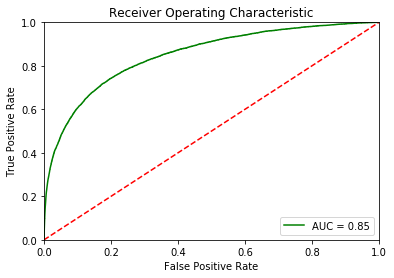

In [18]:
probs1 = model.predict_proba(X_test)
pred1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr1, tpr1, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc1);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [129]:
# Cross validation scores
f1_scores = cross_val_score(model, x_val_1, y_val_1, cv=5, scoring='f1')
print("F1-score = ",f1_scores," Mean F1 score = ",np.mean(f1_scores))

F1-score =  [0.29274218 0.28719197 0.29593693 0.29502262 0.32130178]  Mean F1 score =  0.29843909595975504


In [142]:
model.predict_proba(X_test)[:,1]

array([0.13018508, 0.00831075, 0.00980401, ..., 0.33419666, 0.19761695,
       0.32897615], dtype=float32)

In [19]:
y_pred_test = [ 1 if x > 0.05 else 0 for x in model.predict_proba(X_test)[:,1]]
confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

[[601924 140091]
 [  2400   6534]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    742015
           1       0.04      0.73      0.08      8934

   micro avg       0.81      0.81      0.81    750949
   macro avg       0.52      0.77      0.49    750949
weighted avg       0.98      0.81      0.88    750949



**Trying to early stop**

[0]	validation_0-error:0.044955	validation_0-logloss:0.612474	validation_1-error:0.013371	validation_1-logloss:0.608089
[1]	validation_0-error:0.044955	validation_0-logloss:0.546954	validation_1-error:0.01344	validation_1-logloss:0.538454
[2]	validation_0-error:0.044955	validation_0-logloss:0.492762	validation_1-error:0.013431	validation_1-logloss:0.478166
[3]	validation_0-error:0.04438	validation_0-logloss:0.446544	validation_1-error:0.013679	validation_1-logloss:0.427184
[4]	validation_0-error:0.044243	validation_0-logloss:0.407306	validation_1-error:0.013504	validation_1-logloss:0.385589
[5]	validation_0-error:0.044105	validation_0-logloss:0.373842	validation_1-error:0.013231	validation_1-logloss:0.34872
[6]	validation_0-error:0.044018	validation_0-logloss:0.345274	validation_1-error:0.01272	validation_1-logloss:0.316376
[7]	validation_0-error:0.044043	validation_0-logloss:0.320388	validation_1-error:0.012667	validation_1-logloss:0.288331
[8]	validation_0-error:0.044055	validation_0

[69]	validation_0-error:0.043006	validation_0-logloss:0.141138	validation_1-error:0.013866	validation_1-logloss:0.06825
[70]	validation_0-error:0.043056	validation_0-logloss:0.141047	validation_1-error:0.013881	validation_1-logloss:0.068205
[71]	validation_0-error:0.043043	validation_0-logloss:0.140934	validation_1-error:0.013884	validation_1-logloss:0.06816
[72]	validation_0-error:0.043018	validation_0-logloss:0.140875	validation_1-error:0.01388	validation_1-logloss:0.068123
[73]	validation_0-error:0.043043	validation_0-logloss:0.140781	validation_1-error:0.013905	validation_1-logloss:0.068089
[74]	validation_0-error:0.043043	validation_0-logloss:0.140693	validation_1-error:0.013912	validation_1-logloss:0.068055
[75]	validation_0-error:0.043031	validation_0-logloss:0.14062	validation_1-error:0.013922	validation_1-logloss:0.068028
[76]	validation_0-error:0.043043	validation_0-logloss:0.140554	validation_1-error:0.013918	validation_1-logloss:0.068006
[77]	validation_0-error:0.042993	val

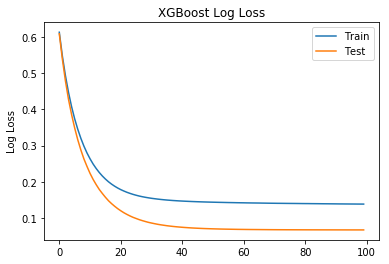

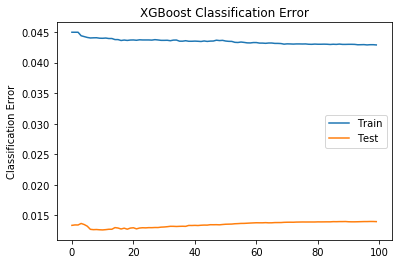

In [132]:
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [135]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=5, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.608089
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.538454
[2]	validation_0-logloss:0.478166
[3]	validation_0-logloss:0.427184
[4]	validation_0-logloss:0.385589
[5]	validation_0-logloss:0.34872
[6]	validation_0-logloss:0.316376
[7]	validation_0-logloss:0.288331
[8]	validation_0-logloss:0.263525
[9]	validation_0-logloss:0.242843
[10]	validation_0-logloss:0.223487
[11]	validation_0-logloss:0.20688
[12]	validation_0-logloss:0.19241
[13]	validation_0-logloss:0.179184
[14]	validation_0-logloss:0.168103
[15]	validation_0-logloss:0.15767
[16]	validation_0-logloss:0.148094
[17]	validation_0-logloss:0.140081
[18]	validation_0-logloss:0.132868
[19]	validation_0-logloss:0.126225
[20]	validation_0-logloss:0.120379
[21]	validation_0-logloss:0.115013
[22]	validation_0-logloss:0.110362
[23]	validation_0-logloss:0.106093
[24]	validation_0-logloss:0.102274
[25]	validation_0-logloss:0.099081
[26]	validation_0-logloss:0.095909
[2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [136]:
y_pred_test = [ 1 if x > 0.05 else 0 for x in model.predict_proba(X_test)[:,1]]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[601924 140091]
 [  2400   6534]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    742015
           1       0.04      0.73      0.08      8934

   micro avg       0.81      0.81      0.81    750949
   macro avg       0.52      0.77      0.49    750949
weighted avg       0.98      0.81      0.88    750949



**Standardizing the predictor variables**

In [94]:
from sklearn import preprocessing

In [95]:
#standardized_X = preprocessing.scale(X_train)
#standardized_X

array([[-0.56258726, -0.87902789, -0.29028148, ..., -1.51466407,
        -2.03419051, -0.33161103],
       [-0.12555321, -0.11821987, -0.35526701, ...,  0.6602124 ,
         0.49159604, -0.33161103],
       [ 2.57244563,  1.7838002 ,  0.3324234 , ...,  0.6602124 ,
         0.49159604, -0.33161103],
       ...,
       [-0.21254191, -0.11821987, -0.35526701, ...,  0.6602124 ,
         0.49159604, -0.33161103],
       [-0.49970469, -0.11821987, -0.35526701, ...,  0.6602124 ,
         0.49159604, -0.33161103],
       [-0.56258726, -0.87902789,  0.31858988, ...,  0.6602124 ,
         0.49159604, -0.33161103]])

In [96]:
#num_cols = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [102]:
num_cols = ['ACH_IN_MTD_AMT', 'ACH_IN_MTD_QTY', 'ACH_OUT_MTD_AMT',
       'ACH_OUT_MTD_QTY', 'CHK_WRITTEN_MTD_QTY', 'DEBIT_CARD_MTD_AMT',
       'DEBIT_CARD_MTD_QTY', 'MOBILE_STD_DEP_QTY', '%diff_ACH_IN',
       'diff_ACH_IN_QTY', '%diff_ACH_OUT', '%diff_CHECK_WRITTEN',
       'diff_CHECK_WRITTEN', '%diff_DEBIT_CARD', 'diff_DEBIT_CARD_QTY',
       'CHK_WRITTEN_per_trans', 'inactive_months', 'CONS_LOAN_BAL_AMT',
       'CONS_LOAN_WAR_PCT', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT',
       'MORTGAGE_BAL_AMT', 'SAVINGS_BAL_AMT', 'CHECKING_BAL_AMT',
       'CREDIT_CARD_BAL_AMT', 'LAST_DIRECT_DEPOSIT_AMT', 'AVG_MONTHLY_BAL_AMT',
       'LAST_STMT_BAL_AMT', '%diff_AVG_MONTHLY_BAL', '%diff_LAST_STMT_BAL','recency']

In [165]:
scaler_X_train = preprocessing.scale(X_train)

In [148]:
df = pd.DataFrame(scaler_X_train)

In [152]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaled_data = scaler_X.fit_transform(X_train)

In [153]:
scaled_data

array([[-0.56258726, -0.87902789, -0.29028148, ..., -1.51466407,
        -2.03419051, -0.33161103],
       [-0.12555321, -0.11821987, -0.35526701, ...,  0.6602124 ,
         0.49159604, -0.33161103],
       [ 2.57244563,  1.7838002 ,  0.3324234 , ...,  0.6602124 ,
         0.49159604, -0.33161103],
       ...,
       [-0.21254191, -0.11821987, -0.35526701, ...,  0.6602124 ,
         0.49159604, -0.33161103],
       [-0.49970469, -0.11821987, -0.35526701, ...,  0.6602124 ,
         0.49159604, -0.33161103],
       [-0.56258726, -0.87902789,  0.31858988, ...,  0.6602124 ,
         0.49159604, -0.33161103]])

In [150]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,...,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04,8.001300e+04
mean,-3.448292e-16,-8.913185e-16,-6.650439e-16,6.242380e-16,-1.859114e-15,3.435693e-16,1.968856e-15,9.856812e-15,-9.849297e-16,2.047130e-15,...,3.782831e-16,5.306963e-16,-8.827198e-17,-1.178976e-16,2.350096e-16,2.828774e-16,-3.810534e-17,-7.817004e-16,1.414957e-16,-6.113005e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-5.625873e-01,-8.790279e-01,-3.552670e-01,-6.659230e-01,-5.300121e-01,-6.282157e-01,-6.775970e-01,-3.007135e-01,-1.349997e+00,-3.290787e+00,...,-2.946016e-01,-3.950299e-01,-3.747856e-01,-3.755556e-01,-1.181349e+00,-7.276908e-01,-1.118804e+00,-1.514664e+00,-2.034191e+00,-3.316110e-01
25%,-5.625873e-01,-8.790279e-01,-3.552670e-01,-6.659230e-01,-5.300121e-01,-6.282157e-01,-6.775970e-01,-3.007135e-01,-1.573133e-01,-1.798373e-03,...,-2.946016e-01,-3.950299e-01,-3.548129e-01,-3.567876e-01,-3.372390e-01,-2.495751e-01,-7.199830e-01,-1.514664e+00,4.915960e-01,-3.316110e-01
50%,-2.933056e-01,-1.182199e-01,-3.206072e-01,-4.753813e-01,-5.300121e-01,-5.053112e-01,-5.335212e-01,-3.007135e-01,-1.229978e-01,-1.798373e-03,...,-2.946016e-01,-2.092889e-01,-3.061561e-01,-3.075878e-01,-1.763971e-01,-1.921740e-01,-1.644820e-01,6.602124e-01,4.915960e-01,-3.316110e-01
75%,1.249520e-01,2.621841e-01,-9.179831e-02,2.867853e-01,1.434029e-01,2.752431e-01,3.669529e-01,-3.007135e-01,-9.952451e-02,-1.798373e-03,...,-2.946016e-01,-8.031570e-03,-1.272521e-01,-1.267468e-01,-1.837582e-02,-1.477611e-01,4.408716e-01,6.602124e-01,4.915960e-01,-3.316110e-01
max,6.642741e+00,5.207436e+00,7.403945e+00,4.669243e+00,4.857307e+00,4.555779e+00,3.824773e+00,6.069346e+00,6.901768e+00,3.287190e+00,...,6.123711e+00,8.091845e+00,7.041135e+00,7.024531e+00,6.892922e+00,7.623208e+00,9.115233e+00,6.602124e-01,4.915960e-01,3.015581e+00


In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_train))
df = pd.DataFrame(scaler.transform(X_train))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [158]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,...,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000,80013.000000
mean,0.078079,0.144423,0.045786,0.124818,0.098381,0.121184,0.150498,0.047207,0.163601,0.500273,...,0.045900,0.046546,0.050538,0.050750,0.146310,0.087139,0.109322,0.696437,0.805369,0.099071
std,0.138787,0.164300,0.128880,0.187437,0.185622,0.192903,0.222107,0.156985,0.121187,0.152023,...,0.155805,0.117830,0.134846,0.135134,0.123851,0.119748,0.097714,0.459799,0.395919,0.298760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144537,0.500000,...,0.000000,0.000000,0.002693,0.002536,0.104543,0.057253,0.038970,0.000000,1.000000,0.000000
50%,0.037373,0.125000,0.004467,0.035714,0.000000,0.023708,0.032000,0.000000,0.148695,0.500000,...,0.000000,0.021886,0.009254,0.009185,0.124464,0.064127,0.093250,1.000000,1.000000,0.000000
75%,0.095421,0.187500,0.033956,0.178571,0.125000,0.174278,0.232000,0.000000,0.151540,0.500000,...,0.000000,0.045600,0.033379,0.033622,0.144034,0.069445,0.152401,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
scaler_X_test = preprocessing.scale(X_test)

In [170]:
# fit model on training data
model = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1);
model.fit(scaler_X_train, y_train) 

# make predictions for test data
y_pred = model.predict(scaler_X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.77%


In [171]:
y_pred_test = [1 if x > 0.05 else 0 for x in model.predict_proba(scaler_X_test)[:,1]]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[537171 204844]
 [  1914   7020]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84    742015
           1       0.03      0.79      0.06      8934

   micro avg       0.72      0.72      0.72    750949
   macro avg       0.51      0.75      0.45    750949
weighted avg       0.98      0.72      0.83    750949



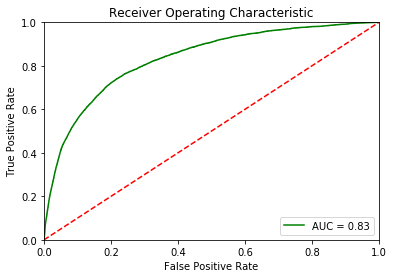

In [172]:
probs1 = model.predict_proba(scaler_X_test)
pred1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr1, tpr1, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc1);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

---------------------------------------------------------------------

**Model with reduced variables**

In [64]:
lasso_model = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
lasso_model.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [65]:
lasso_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

In [66]:
selected_feat = X_train.columns[(lasso_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

total features: 34
selected features: 28


In [67]:
X_train_selected = lasso_model.transform(X_train.fillna(0))
X_test_selected = lasso_model.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((80013, 28), (750949, 28))

In [69]:
# fit model on training data
model_red_vars = XGBClassifier(n_jobs=-1);
model_red_vars.fit(X_train_selected, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

**Out of sample**

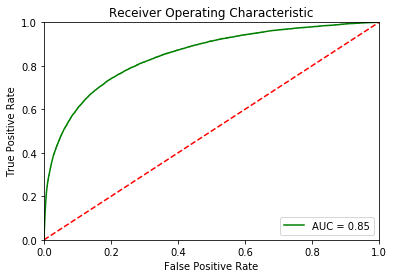

In [74]:
probs1 = model_red_vars.predict_proba(X_test_selected)
pred1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic');
plt.plot(fpr1, tpr1, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc1);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
y_pred_test = [ 1 if x > 0.05 else 0 for x in model_red_vars.predict_proba(X_test_selected)[:,1]]
confusion_matrix(y_test, y_pred_test)

array([[600208, 141807],
       [  2393,   6541]], dtype=int64)

recall--0.73, precision--0.044

In [76]:
# Cross validation scores
f1_scores = cross_val_score(model_red_vars, X_test_selected, y_test, cv=5, scoring='f1')
print("F1-score = ",f1_scores," Mean F1 score = ",np.mean(f1_scores))

F1-score =  [0.         0.         0.         0.01724138 0.03949219]  Mean F1 score =  0.01134671433579722


In [78]:
y_test.shape

(750949, 1)

**Precision recall curve**

In [81]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

y_score = model_red_vars.predict_proba(X_test_selected)[:,-1]
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {}'.format(average_precision))

Average precision-recall score: 0.14713800752641756


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.15')

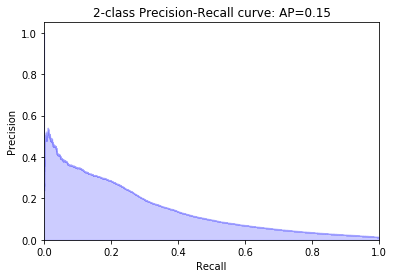

In [80]:
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))